<a href="https://colab.research.google.com/github/robitussin/CCMACLRL_EXERCISES/blob/main/Exercise9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Exercise 9: Choosing the best performing model on a dataset

Instructions:

- Use the Dataset File to train your model
- Use the Test File to generate your results
- Use the Sample Submission file to generate the same format
- Use all classification models

Submit your results to:
https://www.kaggle.com/competitions/playground-series-s4e10/overview



In [41]:
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

## Dataset File

In [42]:
dataset_url = 'https://github.com/robitussin/CCMACLRL_EXERCISES/blob/main/datasets/loan_approval/train.csv?raw=true'
df = pd.read_csv(dataset_url)

In [43]:
df.head(5)

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0


## Test File

In [44]:
test_url = 'https://github.com/robitussin/CCMACLRL_EXERCISES/blob/main/datasets/loan_approval/test.csv?raw=true'
dt=pd.read_csv(test_url)

In [45]:
dt.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,58645,23,69000,RENT,3.0,HOMEIMPROVEMENT,F,25000,15.76,0.36,N,2
1,58646,26,96000,MORTGAGE,6.0,PERSONAL,C,10000,12.68,0.10,Y,4
2,58647,26,30000,RENT,5.0,VENTURE,E,4000,17.19,0.13,Y,2
3,58648,33,50000,RENT,4.0,DEBTCONSOLIDATION,A,7000,8.90,0.14,N,7
4,58649,26,102000,MORTGAGE,8.0,HOMEIMPROVEMENT,D,15000,16.32,0.15,Y,4


In [46]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39098 entries, 0 to 39097
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39098 non-null  int64  
 1   person_age                  39098 non-null  int64  
 2   person_income               39098 non-null  int64  
 3   person_home_ownership       39098 non-null  object 
 4   person_emp_length           39098 non-null  float64
 5   loan_intent                 39098 non-null  object 
 6   loan_grade                  39098 non-null  object 
 7   loan_amnt                   39098 non-null  int64  
 8   loan_int_rate               39098 non-null  float64
 9   loan_percent_income         39098 non-null  float64
 10  cb_person_default_on_file   39098 non-null  object 
 11  cb_person_cred_hist_length  39098 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.6+ MB


## Sample Submission File

In [64]:
sample_submission_url ='https://github.com/robitussin/CCMACLRL_EXERCISES/blob/main/datasets/loan_approval/sample_submission.csv?raw=true'

sf=pd.read_csv(sample_submission_url)

In [65]:
sf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39098 entries, 0 to 39097
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           39098 non-null  int64  
 1   loan_status  39098 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 611.0 KB


# Preprocess 

### Change categorical to int

In [50]:
X = df.drop(columns=['loan_status']) 
y = df['loan_status']

In [51]:

from sklearn.calibration import LabelEncoder

df_copy = X.copy()
dt_copy = dt.copy()

le = LabelEncoder()

# Apply LabelEncoder to all categorical columns in data TRAIN
for column in df_copy.select_dtypes(include=['object', 'category']).columns:
    df_copy[column] = le.fit_transform(df_copy[column])

# Apply LabelEncoder to all categorical columns in data TEST
for column in dt_copy.select_dtypes(include=['object', 'category']).columns:
    dt_copy[column] = le.fit_transform(dt_copy[column])

print(df_copy.info())
print(dt_copy.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          58645 non-null  int64  
 1   person_age                  58645 non-null  int64  
 2   person_income               58645 non-null  int64  
 3   person_home_ownership       58645 non-null  int32  
 4   person_emp_length           58645 non-null  float64
 5   loan_intent                 58645 non-null  int32  
 6   loan_grade                  58645 non-null  int32  
 7   loan_amnt                   58645 non-null  int64  
 8   loan_int_rate               58645 non-null  float64
 9   loan_percent_income         58645 non-null  float64
 10  cb_person_default_on_file   58645 non-null  int32  
 11  cb_person_cred_hist_length  58645 non-null  int64  
dtypes: float64(3), int32(4), int64(5)
memory usage: 4.5 MB
None
<class 'pandas.core.frame.Da

### Scale 

In [11]:
from sklearn.discriminant_analysis import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(df_copy) # TEST
X_test_scaled = scaler.fit_transform(dt_copy)  # TEST

## 1. Train a KNN Classifier

In [12]:
# Initialize KNN classifier
knn = KNeighborsClassifier(n_neighbors=15)  

- Perform cross validation

In [14]:
# put your answer here
from sklearn.model_selection import cross_val_score

cv_knn = cross_val_score(knn, X_train_scaled, y, cv=5, scoring='accuracy')

# Print cross-validation scores and mean score
print(f'Cross-validation scores: {cv_knn}')
print(f'Mean cross-validation accuracy: {cv_knn.mean()}')

Cross-validation scores: [0.91303606 0.91891892 0.91934521 0.91994202 0.91431495]
Mean cross-validation accuracy: 0.9171114331997614


## 2. Train a Logistic Regression Classifier

In [15]:
# put your answer here
log_reg = LogisticRegression()

- Perform cross validation

In [16]:
# put your answer here
cv_log = cross_val_score(log_reg, X_train_scaled, y, cv=5, scoring='accuracy')

# Print cross-validation scores and mean accuracy
print(f'Cross-validation scores: {cv_log}')
print(f'Mean cross-validation accuracy: {cv_log.mean()}')    

Cross-validation scores: [0.8943644  0.8943644  0.89717794 0.89717794 0.89521698]
Mean cross-validation accuracy: 0.8956603290988149


## 3. Train a Naive Bayes Classifier

In [17]:
# put your answer here
nb_classifier = GaussianNB()

- Perform cross validation

In [18]:
# put your answer here
cv_nb = cross_val_score(nb_classifier, X_train_scaled, y, cv=5, scoring='accuracy')

# Print cross-validation scores and mean accuracy
print(f'Cross-validation scores: {cv_nb}')
print(f'Mean cross-validation accuracy: {cv_nb.mean()}')

Cross-validation scores: [0.84534061 0.84568164 0.85267286 0.8515645  0.84960355]
Mean cross-validation accuracy: 0.8489726319379315


## 4. Train a SVM Classifier

In [19]:
# put your answer here
svm_classifier_l = SVC(kernel='linear')
svm_classifier_g = SVC(kernel='rbf')
svm_classifier_p = SVC(kernel='poly')
svm_classifier_s = SVC(kernel='sigmoid')

- Perform cross validation

In [20]:
# put your answer here
cv_svm = cross_val_score(svm_classifier_l, X_train_scaled, y, cv=5, scoring='accuracy')

# Print cross-validation scores and mean accuracy
print(f'Cross-validation scores: {cv_svm}')
print(f'Mean cross-validation accuracy: {cv_svm.mean()}')

Cross-validation scores: [0.89385284 0.892915   0.89462017 0.89402336 0.89479069]
Mean cross-validation accuracy: 0.8940404126524001


## 5. Train a Decision Tree Classifier

In [21]:
# put your answer here
tree_classifier = DecisionTreeClassifier()

- Perform cross validation

In [22]:
# put your answer here
cv_dt = cross_val_score(tree_classifier, X_train_scaled, y, cv=5, scoring='accuracy')

# Print cross-validation scores and mean accuracy
print(f'Cross-validation scores: {cv_dt}')
print(f'Mean cross-validation accuracy: {cv_dt.mean()}')

Cross-validation scores: [0.1688976  0.89325603 0.89086879 0.92096513 0.83869043]
Mean cross-validation accuracy: 0.742535595532441


## 6. Train a Random Forest Classifier

In [71]:
# put your answer here
rf_classifier = RandomForestClassifier(n_estimators=125, random_state=42)

- Perform cross validation

In [72]:
# put your answer here
cv_rf = cross_val_score(rf_classifier, X_train_scaled, y, cv=5, scoring='accuracy')

# Print cross-validation scores and mean accuracy
print(f'Cross-validation scores: {cv_rf}')
print(f'Mean cross-validation accuracy: {cv_rf.mean()}')

Cross-validation scores: [0.22329269 0.94944156 0.94910052 0.95157302 0.94969733]
Mean cross-validation accuracy: 0.8046210248102993


## 7. Compare all the performance of all classification models

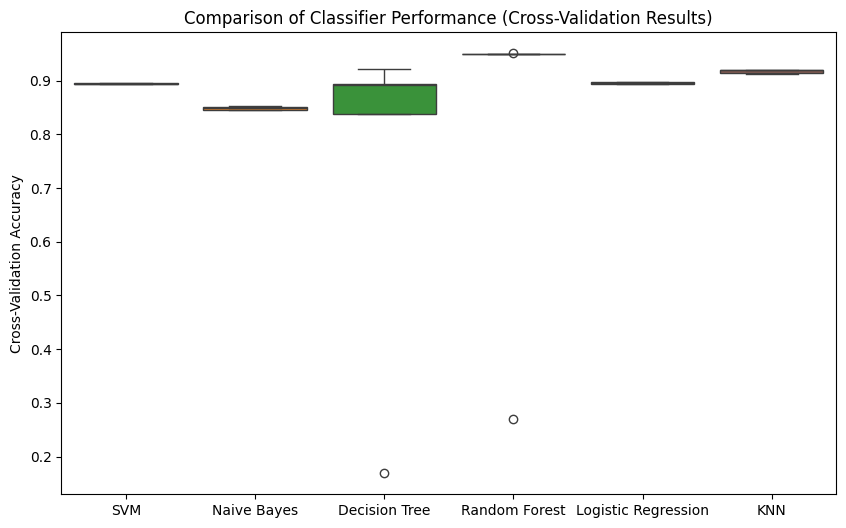

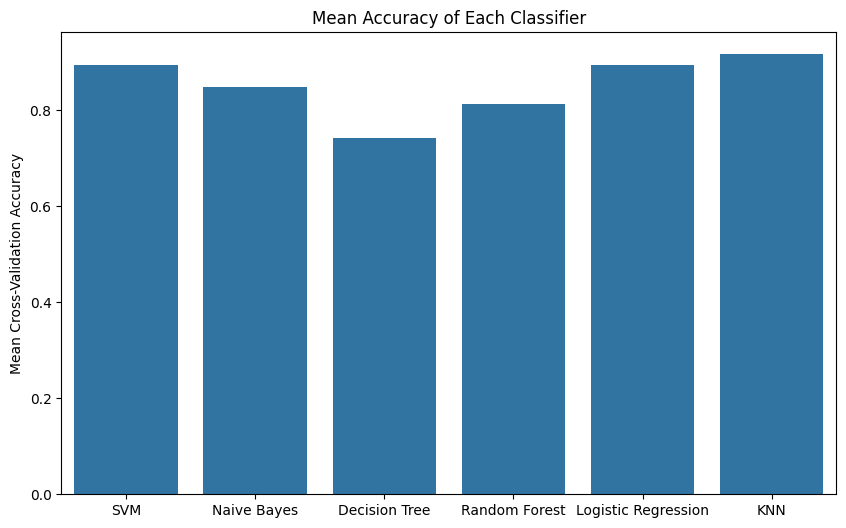

In [27]:
# put your answer here
import numpy as np


# Combine all scores into a dictionary for easier visualization
cv_results = {
    'SVM': cv_svm,
    'Naive Bayes': cv_nb,
    'Decision Tree': cv_dt,
    'Random Forest': cv_rf,
    'Logistic Regression': cv_log,
    'KNN': cv_knn
}

# Create a box plot to show the distribution of the cross-validation results
plt.figure(figsize=(10, 6))
sns.boxplot(data=list(cv_results.values()))

# Set labels and title
plt.xticks(range(len(cv_results)), cv_results.keys())
plt.ylabel('Cross-Validation Accuracy')
plt.title('Comparison of Classifier Performance (Cross-Validation Results)')

# Show the plot
plt.show()

# You can also create a bar chart to compare the mean accuracy of each classifier
mean_scores = [np.mean(scores) for scores in cv_results.values()]

plt.figure(figsize=(10, 6))
sns.barplot(x=list(cv_results.keys()), y=mean_scores)

# Set labels and title
plt.ylabel('Mean Cross-Validation Accuracy')
plt.title('Mean Accuracy of Each Classifier')

# Show the plot
plt.show()

## 9. Generate Submission File

Choose the model that has the best performance to generate a submission file.

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          58645 non-null  int64  
 1   person_age                  58645 non-null  int64  
 2   person_income               58645 non-null  int64  
 3   person_home_ownership       58645 non-null  object 
 4   person_emp_length           58645 non-null  float64
 5   loan_intent                 58645 non-null  object 
 6   loan_grade                  58645 non-null  object 
 7   loan_amnt                   58645 non-null  int64  
 8   loan_int_rate               58645 non-null  float64
 9   loan_percent_income         58645 non-null  float64
 10  cb_person_default_on_file   58645 non-null  object 
 11  cb_person_cred_hist_length  58645 non-null  int64  
 12  loan_status                 58645 non-null  int64  
dtypes: float64(3), int64(6), object

### Model to Use 

In [62]:
model = rf_classifier.fit(X_train_scaled, y)

In [68]:
sample_submission_url ='https://github.com/robitussin/CCMACLRL_EXERCISES/blob/main/datasets/loan_approval/sample_submission.csv?raw=true'
sf=pd.read_csv(sample_submission_url)

id = sf.pop('id')
y_pred = model.predict(X_test_scaled)

# Create a submission DataFrame
submission_df = pd.DataFrame({
    'id': id,
    'loan_status': y_pred
})

# Save the submission DataFrame to a CSV file
submission_df.to_csv('submission_file.csv', index=False)
print("Submission file created: submission_file.csv!")

Submission file created: submission_file.csv
